We first import the libraries that are needed to run the code.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1
The function that gives us the finite coefficients.

The function takes positive integers L, R, N while also verifying that L + R + 1 should be less than or equal to N.

The function also takes a constant grid spacing (delta_x)

The function takes a vector of length L + R + 1

The function returns a matric D of size N x N


An example of how to use the function is also provided in the same code cell



In [2]:
def finite_difference_coefficients(N, L, R, delta_x, a):
    # Check if L + R + 1 <= N
    if L + R + 1 > N:
        raise ValueError("L + R + 1 should be less than or equal to N")
    
    D = np.zeros((N, N))
    for i in range(N):
        for j in range(-L, R + 1):
            # Use modulo operation for periodic boundary conditions
            column = (i + j) % N
            D[i, column] = a[j + L]
    
    return D / delta_x

# Example usage:
N = 5  # number of nodes
L = 1  # number of left neighbors
R = 1  # number of right neighbors
delta_x = 1.0 / N  # grid spacing
a = np.array([-1/2, 0, 1/2])  # coefficients for central difference approximation

# Construct the finite difference matrix D
D_matrix = finite_difference_coefficients(N, L, R, delta_x, a)
D_matrix

array([[ 0. ,  2.5,  0. ,  0. , -2.5],
       [-2.5,  0. ,  2.5,  0. ,  0. ],
       [ 0. , -2.5,  0. ,  2.5,  0. ],
       [ 0. ,  0. , -2.5,  0. ,  2.5],
       [ 2.5,  0. ,  0. , -2.5,  0. ]])

# Problem 2

The function chosen to test our code is:

\begin{equation}
f = \frac{\sin(2 \pi x)}{ 2 \pi}
\end{equation}

This is because sin(x) can be derivived many times and the specific function allows us to have a clean looking derivative:

\begin{equation}
f' = \cos(2 \pi x)
\end{equation}

The function is also known to be periodic in the domain chosen.

In [3]:
def f(x):
    return np.sin(2*np.pi * x) / (2*np.pi)

def df(x):
    return np.cos(2*np.pi * x)

def calculate_errors(D, f_values, df_exact):
    # Compute the numerical derivative using the D matrix
    df_numerical = D @ f_values
    
    # Calculate the error vector
    e = df_numerical - df_exact
    
    # Calculate the l1 and l2 norms of the error
    l1_norm = np.max(np.abs(e))
    l2_norm = np.sqrt(np.mean(e**2))
    
    return l1_norm, l2_norm



In [4]:
#compute the D matrix for a given N
def compute_D_matrix(N, L, R, a):
    delta_x = 1.0 / N
    D = finite_difference_coefficients(N, L, R, delta_x, a)
    return D

#compute errors for different values of N
def compute_errors_over_N(N_values, L, R, a, f, df):
    l_infinity_norms = []
    l2_norms = []
    delta_xs = []

    for N in N_values:
        x = np.linspace(0, 1, N, endpoint=False)
        f_values = f(x)
        df_exact = df(x)
        D = compute_D_matrix(N, L, R, a)
        l_infinity_norm, l2_norm = calculate_errors(D, f_values, df_exact)
        
        l_infinity_norms.append(l_infinity_norm)
        l2_norms.append(l2_norm)
        delta_xs.append(1.0 / N)

    return delta_xs, l_infinity_norms, l2_norms

In [5]:
a_forward = np.array([0, -1, 1])
a_central = np.array([-1/2, 0, 1/2])
N_values = range(10, 201, 5)

#compute errors for the forward and central difference schemes
def compute_errors_schemes(N_values, f, df):
    errors_forward = {'delta_x': [], 'l_infinity': [], 'l2': []}
    errors_central = {'delta_x': [], 'l_infinity': [], 'l2': []}

    for N in N_values:
        delta_x = 1.0 / N
        x = np.linspace(0, 1, N, endpoint=False)
        f_values = f(x)
        df_exact = df(x)
        
        #forward difference scheme
        D_forward = compute_D_matrix(N, 1, 1, a_forward)
        l_infinity_norm_forward, l2_norm_forward = calculate_errors(D_forward, f_values, df_exact)
        errors_forward['delta_x'].append(N)
        errors_forward['l_infinity'].append(l_infinity_norm_forward)
        errors_forward['l2'].append(l2_norm_forward)
        
        #central difference scheme
        D_central = compute_D_matrix(N, 1, 1, a_central)
        l_infinity_norm_central, l2_norm_central = calculate_errors(D_central, f_values, df_exact)
        errors_central['delta_x'].append(N
                                        )
        errors_central['l_infinity'].append(l_infinity_norm_central)
        errors_central['l2'].append(l2_norm_central)

    return errors_forward, errors_central


errors_forward, errors_central = compute_errors_schemes(N_values, f, df)

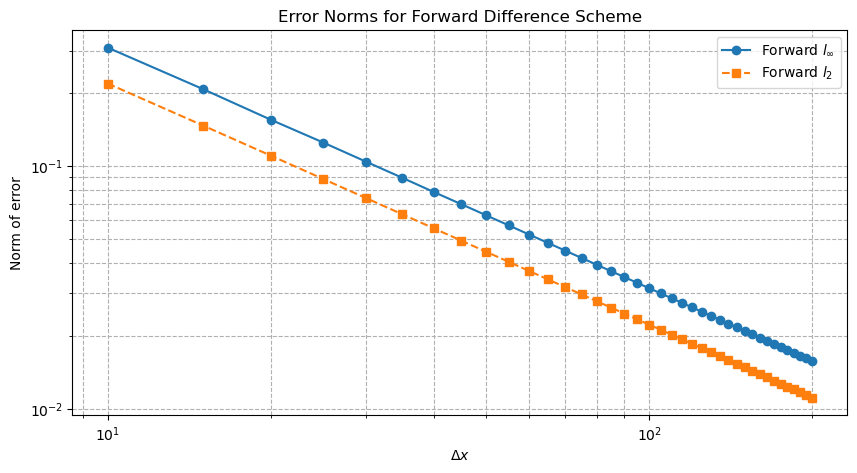

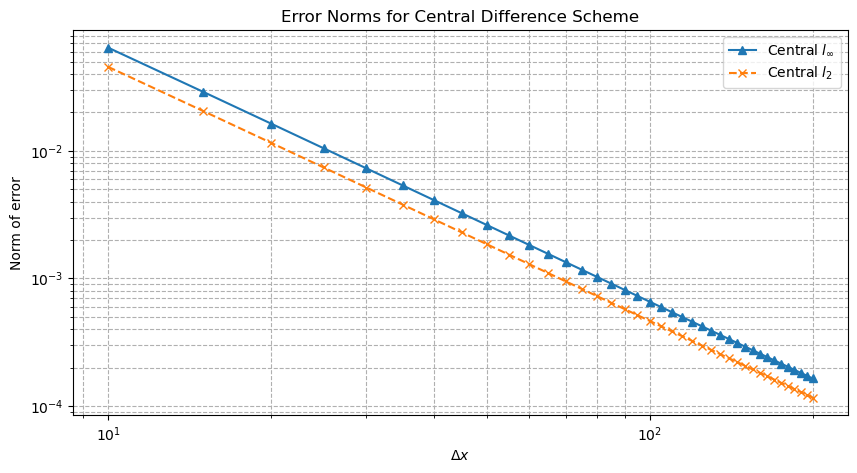

In [8]:
#plotting the errors for forward difference scheme
plt.figure(figsize=(10, 5))

#prrors for the forward difference scheme
plt.loglog(errors_forward['delta_x'], errors_forward['l_infinity'], label='Forward $l_{\infty}$', marker='o', linestyle='-')
plt.loglog(errors_forward['delta_x'], errors_forward['l2'], label='Forward $l_2$', marker='s', linestyle='--')

plt.xlabel('$\Delta x$')
plt.ylabel('Norm of error')
plt.title('Error Norms for Forward Difference Scheme')
plt.legend()
plt.grid(True, which="both", ls="--")
# plt.gca().invert_xaxis()
plt.show()

#plotting the errors for central difference scheme
plt.figure(figsize=(10, 5))

#errors for the central difference scheme
plt.loglog(errors_central['delta_x'], errors_central['l_infinity'], label='Central $l_{\infty}$', marker='^', linestyle='-')
plt.loglog(errors_central['delta_x'], errors_central['l2'], label='Central $l_2$', marker='x', linestyle='--')

plt.xlabel('$\Delta x$')
plt.ylabel('Norm of error')
plt.title('Error Norms for Central Difference Scheme')
plt.legend()
plt.grid(True, which="both", ls="--")
# plt.gca().invert_xaxis()
plt.show()


In [10]:
log_delta_x_forward = np.log(errors_forward['delta_x'])
log_l_inf_forward = np.log(errors_forward['l_infinity'])
log_l2_forward = np.log(errors_forward['l2'])

log_delta_x_central = np.log(errors_central['delta_x'])
log_l_inf_central = np.log(errors_central['l_infinity'])
log_l2_central = np.log(errors_central['l2'])

#calculate the slopes (the coefficients of the first degree polynomial fit)
slope_l_inf_forward = np.polyfit(log_delta_x_forward, log_l_inf_forward, 1)[0]
slope_l2_forward = np.polyfit(log_delta_x_forward, log_l2_forward, 1)[0]

slope_l_inf_central = np.polyfit(log_delta_x_central, log_l_inf_central, 1)[0]
slope_l2_central = np.polyfit(log_delta_x_central, log_l2_central, 1)[0]

slope_l_inf_forward, slope_l2_forward, slope_l_inf_central, slope_l2_central

(-0.9970937067637163,
 -0.9981338201941932,
 -1.9966423625171894,
 -1.996642362521288)

From the above, we can see that the slope of

$l_\infty$ error norm for forward difference scheme is: $-0.9970937067637163 \approx -1$

$l_2$ error norm for forward difference scheme is: $-0.9981338201941932 \approx -1$

$l_\infty$ error norm for central difference scheme is: $-1.9966423625171894 \approx -2$

$l_2$ error norm for central difference scheme is: $-1.996642362521288 \approx -2$

Which all match their expected value